# Import packages

In [7]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

# Load an image

<class 'imageio.core.util.Array'>
size of image I: (450, 700, 3)
This is a color image!
uint8
(450, 700)


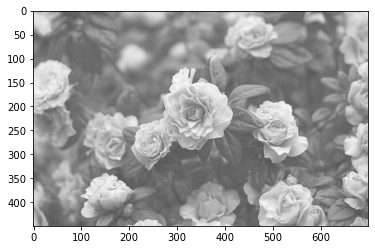

In [11]:
#fName = "tissue.png"
#fName = "micro.png"
fName = "flower.jpg"

I = imageio.imread(fName)
print(type(I))
print('size of image I:', I.shape)
if len(I.shape) > 2:
    print('This is a color image!')
    img = I[:,:,0]
else:
    img = I
print(img.dtype)
print(img.shape)

#plt.imshow(I, cmap='gray', vmin=0, vmax=255)
plt.imshow(I, cmap='gray')

# Compute and display histogram

cdf size: 256


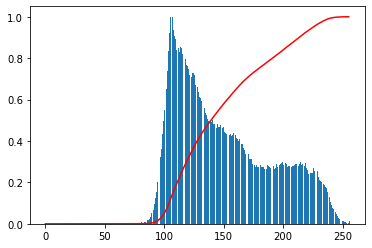

In [15]:
hist, bins = np.histogram(img, bins=256, range=[0,256])
#
# 1. Write your own code to compute the histogram of an image 
# to replace the above line of statement
#
# Initialize
#
# hist = np.zeros(256,)
# ??????
#
# bins = np.arange(257)
#

cdf = np.cumsum(hist)
print('cdf size:', len(cdf))

height, width = img.shape
norm_cdf = cdf / (height * width)

#width = (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist / hist.max(), align='center')
#plt.bar(center, hist, align='center')
plt.plot(norm_cdf, color='r')
plt.show()

# Compute new mapping values by equalizing the histogram

In [16]:
#cdf_min = cdf / 4 * 3
L = 256
mapping = (norm_cdf * (L - 1)).astype("uint8")

# print the mapping
for i in range(L):
    print('Original pixel value', i, '--> new value', mapping[i])

Original pixel value 0 --> new value 0
Original pixel value 1 --> new value 0
Original pixel value 2 --> new value 0
Original pixel value 3 --> new value 0
Original pixel value 4 --> new value 0
Original pixel value 5 --> new value 0
Original pixel value 6 --> new value 0
Original pixel value 7 --> new value 0
Original pixel value 8 --> new value 0
Original pixel value 9 --> new value 0
Original pixel value 10 --> new value 0
Original pixel value 11 --> new value 0
Original pixel value 12 --> new value 0
Original pixel value 13 --> new value 0
Original pixel value 14 --> new value 0
Original pixel value 15 --> new value 0
Original pixel value 16 --> new value 0
Original pixel value 17 --> new value 0
Original pixel value 18 --> new value 0
Original pixel value 19 --> new value 0
Original pixel value 20 --> new value 0
Original pixel value 21 --> new value 0
Original pixel value 22 --> new value 0
Original pixel value 23 --> new value 0
Original pixel value 24 --> new value 0
Original p

# Map the pixel values into the new values

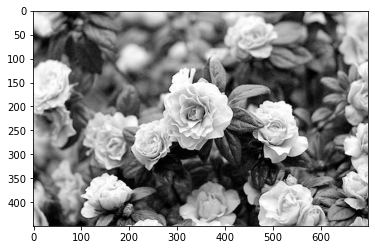

In [17]:
# map the image
img_eq = mapping[img]

# Show the new image
plt.imshow(img_eq, cmap='gray')

# Save the new image into a file
imageio.imwrite('flower_equalized.png', img_eq)

# Show the equalized histogram and Cumulative Distribution Function (CDF)

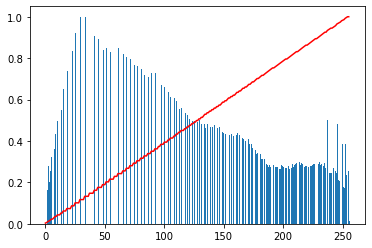

In [18]:
hist_eq, bins = np.histogram(img_eq, bins=256, range=[0,256])

cdf_eq = np.cumsum(hist_eq)
norm_cdf_eq = cdf_eq / (height * width)

center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist_eq / hist_eq.max(), align='center')
plt.plot(norm_cdf_eq, color='r')
plt.show()